## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Libraries 

In [1]:
from sklearn.preprocessing import PowerTransformer
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn import metrics
import pickle
import statsmodels
from statsmodels.formula.api import ols
%matplotlib inline
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [2]:
kc_df = pd.read_csv("data/kc_house_data.csv")
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis

This section will seek to answer the questions listed in business problems. The data will be visualized for easy understanding and followed with appropriate statistical analysis for empirical findings within data. Following are the summaries of the questions answered in this section:
What neighborhood contains most valuable properties?
Does condition of the property affect the value?
Are the property age and condition related?
What features add value to the house?
Do renovations increase property value?
Do basements increase property value?

## Data Integrity and Description

In [3]:
kc_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

For waterfront, view, and yr_renovated, we see that up to 75% of the distribution still remains at a value of 0. As a result, we have decided to fill the NA values in these columns with 0.

In [17]:
#Replace null values and "nan" with 0

kc_df = kc_df.replace("nan","0")

col = ['waterfront', 'view', 'yr_renovated']

for val in col:
    kc_df[val] = kc_df[val].fillna(value=0)

In [18]:
total_null = 0 
for null_count in kc_df.isnull().sum():
    total_null += null_count
print(f"There are total {total_null} null values in the data")

There are total 0 null values in the data


Checking for duplicate dataset

In [ ]:
#Check for duplicates
kc_df_duplicates = kc_df[kc_df.duplicated()]
print(len(kc_df_duplicates))
display(kc_df_duplicates)

In [7]:
#Check for duplicated IDs 
duplicated_ids = kc_df.duplicated(subset=['id'], keep=False)
duplicated_ids.value_counts()

False    21244
True       353
dtype: int64

In [20]:
#Explore duplicated IDs
kc_df_duplicated_ids = kc_df[duplicated_ids]
kc_df_duplicated_ids.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,3,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460


In [21]:
#Drop the duplicates and keep the latest sale of each property
#kc_df.drop_duplicates(subset=['id'], keep='last', inplace=True)
print(kc_df.shape)

(21597, 21)


A home's latitude and longitude will not be particularly relevant for prospective homebuyers. Neither will its id, or the date, as other data, such as yr_built, will be of much more interest. As a result, we will drop these variables, as they do not make much sense in the context of our business problem.

#Remove features/columns that are of no interest for this analysis 
df.drop(['id', 'date','lat','long'], axis=1, inplace=True)

In [22]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [37]:
# Creating ['basement'] to replace 'sqft_basement'
kc_df['basement'] = kc_df['sqft_basement'].apply(lambda x: 0 if x == 0  else 1)
kc_df['basement'].value_counts()

0    13280
1     8317
Name: basement, dtype: int64

In [34]:
# Creating 'Age' to replace 'yr_built' 
kc_df['Age'] = kc_df['yr_built'].apply(lambda x: 1 if x <= 1999 else 2 if x >= 2000 and x < 2010 else 3)
kc_df['Age'].value_counts()

1    16841
2     3515
3     1241
Name: Age, dtype: int64

In [39]:
# Creating 'renovated' so sa to replace the 'yr_renovated'
kc_df['renovated'] = kc_df['yr_renovated'].apply(lambda x: 1 if x <= 1999 else 2 if x >= 2000 and x < 2010 else 3)
kc_df['renovated'].value_counts()

1    21218
2      229
3      150
Name: renovated, dtype: int64

In [40]:
# To reduce the number of classes of bedrooms and increase variability 
kc_df['bedrooms'] = kc_df['bedrooms'].apply(lambda x: x if x <= 6 else 6)
kc_df['bedrooms'].value_counts()

3    9824
4    6882
2    2760
5    1601
6     334
1     196
Name: bedrooms, dtype: int64

## Preview Distribution of Each Column

Before we conduct any transformations, we need to check the distributions in order to identify categorical variables and see if/which features are normally distributed.

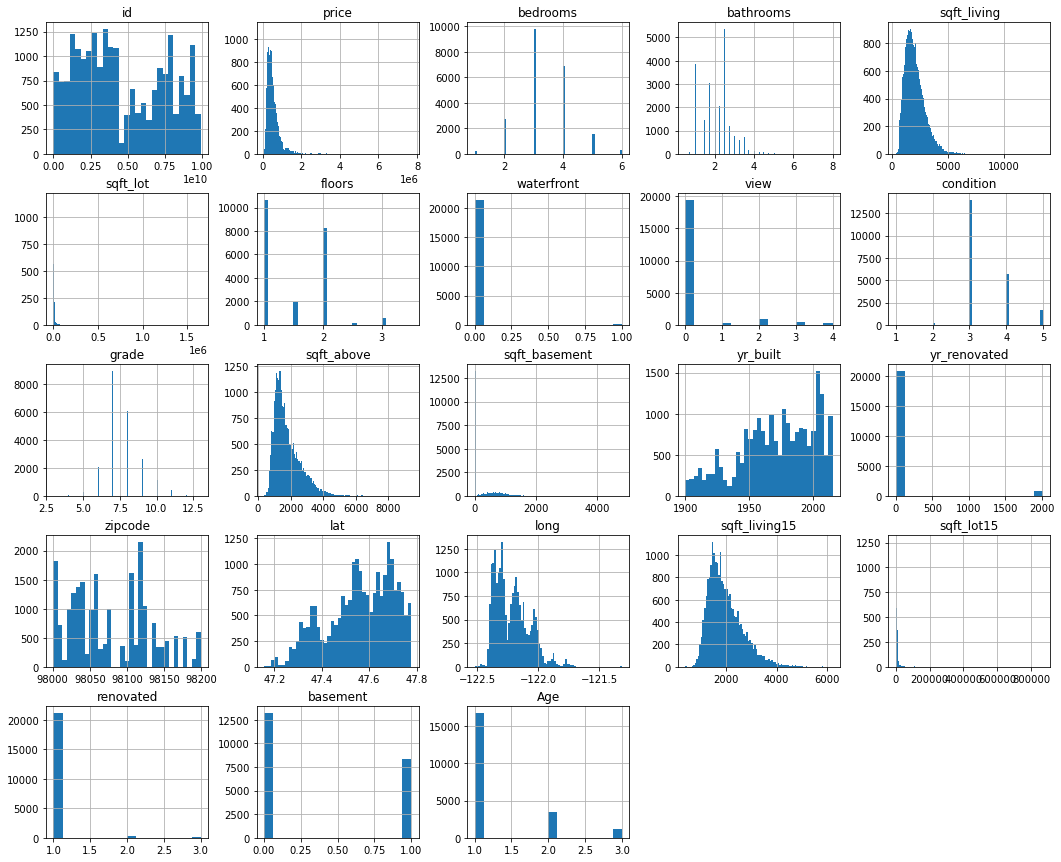

In [41]:
#First, let's plot a histogram for each column
kc_df.hist(figsize=(18,15), bins='auto');


Clearly, bathrooms, bedrooms, condition, floors, grade, view, waterfront, and yr_renovated are categorical. The remaining variables seem to be continuous. Let's explore this further by creating some scatter plots.

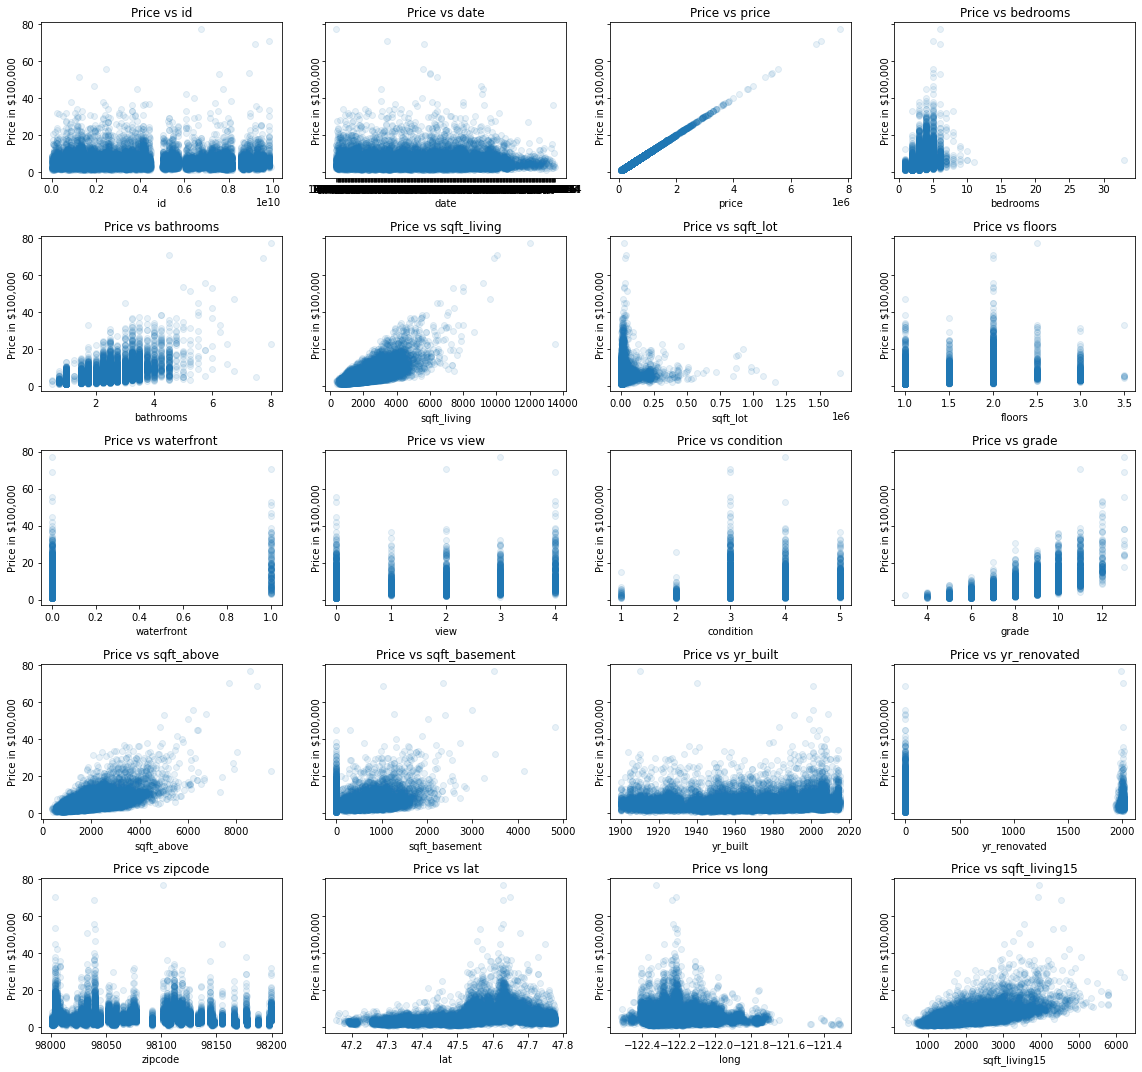

In [26]:
#Next, let's plot scatter plots that will further help us identify outliers and categorical variables 
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), kc_df.columns):
    ax.scatter(kc_df[column], kc_df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()


These scatter plots helped confirm which variables are categorical and which are continuous. We have identified our continuous variables, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, sqft_living15 and sqft_lot15, and later we will look to transform some of these variables, since many of them currently do not appear to follow a normal distribution.


## Correlation Review

Our next logical step would be to investigate correlation amongst variables. First we will look at this more generally, then we will narrow our results to variables that are more highly correlated with our y-variable, price.

In [14]:
kc_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


## Data Structure

The data set contains mix of continuous and categorical values. They are separated by columns and below is a brief summary of each columns. Further details can be found in King County website.

### Column Description

- id - unique ID for a house
- date - Date day house was sold
- price - Price is prediction target
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms
- sqft_living - square footage of the home
- sqft_lot - square footage of the lot
- floors - Total floors (levels) in house
- waterfront - Whether house has a view to a waterfront
- view - Number of times house has been viewed
- condition - How good the condition is (overall)
- grade - overall grade given to the housing unit, based on King County grading system
- sqft_above - square footage of house (apart from basement)
- sqft_basement - square footage of the basement
- yr_built - Year when house was built
- yr_renovated - Year when house was renovated
- zipcode - zip code in which house is located
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Given that many columns contain categorical values that are not pertinent to basic statistical analysis, only few will be chosen for brief overlook of the data.

In [15]:
features = ["price", "yr_built", "bedrooms", "bathrooms", "sqft_living", "sqft_lot",
                    "floors", "condition", "grade", "sqft_living15", "sqft_lot15", "season", "price_zipcode"]

In [16]:
kc_df[features].describe()

KeyError: "['price_zipcode', 'season'] not in index"

In [ ]:
kc_df1 = kc_df[features]

## Correlation Review

Our next logical step would be to investigate correlation amongst variables. First we will look at this more generally, then we will narrow our results to variables that are more highly correlated with our y-variable, price.

In [ ]:
sns.heatmap(kc_df.corr(), center=0);

In [ ]:
#Look at which features are highly correlated with our y-variable, price.
kc_df.corr()[abs(kc_df.corr()['price']) > 0.3]

We should also look at variables to see if they are correlated with each other, in order to investigate potential multicollinearity.

In [ ]:
kc_df = kc_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

kc_df['pairs'] = list(zip(kc_df.level_0, kc_df.level_1))

kc_df.set_index(['pairs'], inplace = True)

kc_df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
kc_df.columns = ['cc']

kc_df.drop_duplicates(inplace=True)

kc_df[(kc_df.cc>.75) & (kc_df.cc<1)]

We see here that several variable-pairs are correlated with one another. We will consider dropping variables that are highly correlated with one another in order to prevent multicollinearity in our model.

## Bedrooms

## Bathrooms

In [ ]:
# histogram of the bathrooms
plt.hist(kc_df['bathrooms'], bins=10)
plt.show()

There seems to be outliers up of up 8 bathrooms in this dataset. This dataset will be power transformed into a gaussian distribution.

In [ ]:
kc_df['bathrooms_lg'] =np.log(kc_df['bathrooms'])
plt.hist(kc_df['bathrooms_lg'], bins=10)
plt.show()

Bathroom_lg now presents a normalized distribution of the bathroom information.

## Lot Size

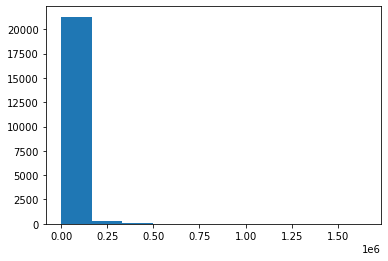

In [43]:
# histogram of the lot size
plt.hist(kc_df['sqft_lot'], bins=10)
plt.show()

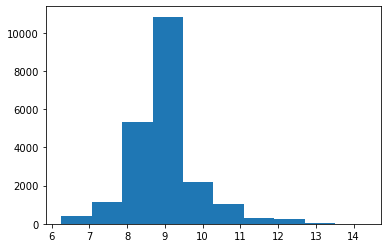

In [42]:
kc_df['sqftlot_lg'] =np.log(kc_df['sqft_lot'])
plt.hist(kc_df['sqft_lg'], bins=10)
plt.show()

## Lot Size 15

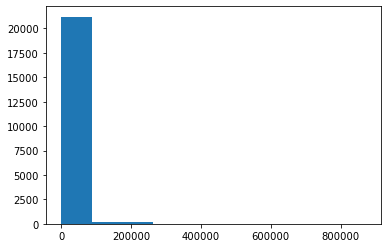

In [44]:
# histogram of the lot size
plt.hist(kc_df['sqft_lot15'], bins=10)
plt.show()

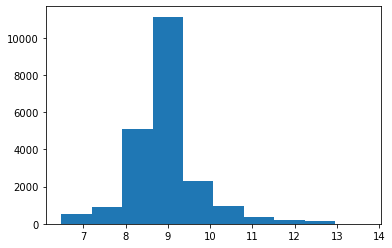

In [45]:
kc_df['sqft15_lg'] =np.log(kc_df['sqft_lot15'])
plt.hist(kc_df['sqft15_lg'], bins=10)
plt.show()

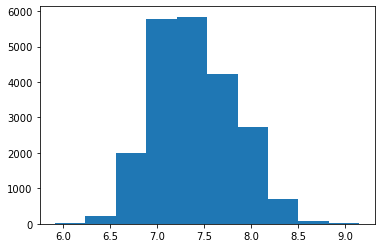

In [47]:
kc_df['sqftabv_lg'] =np.log(kc_df['sqft_above'])
plt.hist(kc_df['sqftabv_lg'], bins=10)
plt.show()

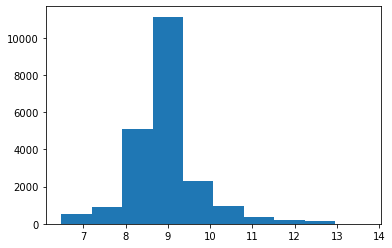

In [48]:
kc_df['sqftlv15_lg'] =np.log(kc_df['sqft_living'])
plt.hist(kc_df['sqft15_lg'], bins=10)
plt.show()

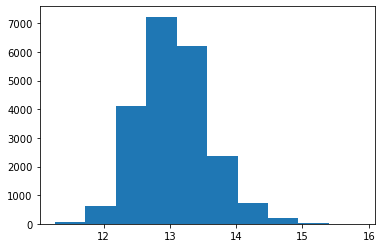

In [49]:
kc_df['price_lg'] =np.log(kc_df['price'])
plt.hist(kc_df['price_lg'], bins=10)
plt.show()

In [60]:
# Removed the condition and grade because the VIF shows high collinaerity among these groups.
cat2 = ['view', 'waterfront','renovated', 'Age', 'basement', 'bedrooms']

In [63]:
cat2_kc_df = kc_df[cat2].astype('category')
dummies = pd.get_dummies(cat2_kc_df, prefix=cat2, drop_first=True)

kc_p1 = kc_df.drop(cat2, axis=1)

kc_p1 = pd.concat([kc_p1, dummies], axis=1)

In [65]:
X2 = kc_p1.drop(['price','id', 'date', 'lat', 'long', 'yr_renovated', 'zipcode', 'sqft_living', 'sqft_lot', 'yr_built', 'sqft_living15', 'sqft_basement', 'sqft_above', 'price_lg', 'sqft_lot15'], axis = 1)
y2 = kc_p1['price']

In [66]:
predictors_int = sm.add_constant(X2)
model1 = sm.OLS(kc_p1['price'],predictors_int).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     1325.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        15:01:30   Log-Likelihood:            -2.9788e+05
No. Observations:               21597   AIC:                         5.958e+05
Df Residuals:                   21573   BIC:                         5.960e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.123e+06   5.15e+04    -41.

In [69]:
# Drop both 'sqftlot_lg' and 'sqftlv15_lg' since they are nor providing significant pvalues.
X3 = kc_p1.drop(['price','sqftlot_lg','sqftlv15_lg','id', 'date', 'lat', 'long', 'yr_renovated', 'zipcode', 'sqft_living', 'sqft_lot', 'yr_built', 'sqft_living15', 'sqft_basement', 'sqft_above', 'price_lg', 'sqft_lot15'], axis = 1)
y2 = kc_p1['price']

In [70]:
predictors_int = sm.add_constant(X3)
model2 = sm.OLS(kc_p1['price'],predictors_int).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     1451.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        15:05:15   Log-Likelihood:            -2.9788e+05
No. Observations:               21597   AIC:                         5.958e+05
Df Residuals:                   21575   BIC:                         5.960e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.111e+06   4.92e+04    -42.

In [ ]:
# Log transforming Price
X3 = kc_p1.drop(['price','sqftlot_lg','sqftlv15_lg','id', 'date', 'lat', 'long', 'yr_renovated', 'zipcode', 'sqft_living', 'sqft_lot', 'yr_built', 'sqft_living15', 'sqft_basement', 'sqft_above', 'price_lg', 'sqft_lot15'], axis = 1)


In [71]:
predictors_int = sm.add_constant(X3)
model3 = sm.OLS(kc_p1['price_lg'],predictors_int).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:               price_lg   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1619.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        15:07:37   Log-Likelihood:                -6574.7
No. Observations:               21597   AIC:                         1.319e+04
Df Residuals:                   21575   BIC:                         1.337e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.4875      0.068    124.

In [ ]:
Model1 

In [56]:
X1 = kc_df.drop(['price','id', 'date', 'lat', 'long', 'yr_renovated', 'zipcode', 'sqft_living', 'sqft_lot', 'yr_built', 'sqft_living15', 'sqft_basement', 'sqft_above', 'price_lg', 'sqft_lot15'], axis = 1)
y1 = kc_df['price']

In [57]:
predictors_int = sm.add_constant(X1)
model1 = sm.OLS(kc_df['price'],predictors_int).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2033.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        14:51:29   Log-Likelihood:            -2.9831e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21582   BIC:                         5.968e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.154e+06   5.01e+04    -42.977      

In [72]:
kc_df['price_zipcode'] = kc_df.groupby("zipcode")["price"].transform('mean')
kc_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement,Age,sqftlot_lg,sqft15_lg,sqftabv_lg,sqftlv15_lg,price_lg,price_zipcode
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1,0,1,8.639411,8.639411,7.073270,7.073270,12.309982,310612.755725
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,1,1,8.887653,8.941022,7.682482,7.851661,13.195614,469928.767726
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,1,0,1,9.210340,8.994917,6.646391,6.646391,12.100712,462488.869258
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,1,1,8.517193,8.517193,6.956545,7.580700,13.311329,551768.520913
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1,0,1,8.997147,8.923058,7.426549,7.426549,13.142166,685675.843537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,1,0,2,7.030857,7.319202,7.333023,7.333023,12.793859,585048.779070
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,1,0,3,8.667852,8.881836,7.745003,7.745003,12.899220,359496.260417
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,1,0,2,7.207860,7.604396,6.927558,6.927558,12.904459,594706.542274
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1,0,2,7.778211,7.160069,7.377759,7.377759,12.899220,617053.966019


In [74]:
quantiles = pd.qcut(kc_df['price_zipcode'], 5, labels=range(1,6))
kc_df= kc_df.assign(p_zipcode_Q=quantiles.values)
kc_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement,Age,sqftlot_lg,sqft15_lg,sqftabv_lg,sqftlv15_lg,price_lg,price_zipcode,p_zipcode_Q
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1,0,1,8.639411,8.639411,7.073270,7.073270,12.309982,310612.755725,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,1,1,8.887653,8.941022,7.682482,7.851661,13.195614,469928.767726,3
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,1,0,1,9.210340,8.994917,6.646391,6.646391,12.100712,462488.869258,3
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,1,1,8.517193,8.517193,6.956545,7.580700,13.311329,551768.520913,3
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1,0,1,8.997147,8.923058,7.426549,7.426549,13.142166,685675.843537,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,1,0,2,7.030857,7.319202,7.333023,7.333023,12.793859,585048.779070,4
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,1,0,3,8.667852,8.881836,7.745003,7.745003,12.899220,359496.260417,2
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,1,0,2,7.207860,7.604396,6.927558,6.927558,12.904459,594706.542274,4
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1,0,2,7.778211,7.160069,7.377759,7.377759,12.899220,617053.966019,4


In [88]:
cat3 = ['view', 'waterfront','renovated', 'Age', 'basement', 'bedrooms','p_zipcode_Q']

In [89]:
cat3_kc_df = kc_df[cat3].astype('category')
dummies = pd.get_dummies(cat3_kc_df, prefix=cat3, drop_first=True)

kc_p2 = kc_df.drop(cat3, axis=1)

kc_p2 = pd.concat([kc_p2, dummies], axis=1)

In [92]:
X4 = kc_p2.drop(['price','price_zipcode','sqftlot_lg','sqftlv15_lg','id', 'date', 'lat', 'long', 'yr_renovated', 'zipcode', 'sqft_living', 'sqft_lot', 'yr_built', 'sqft_living15', 'sqft_basement', 'sqft_above', 'price_lg', 'sqft_lot15'], axis = 1)

In [93]:
predictors_int = sm.add_constant(X4)
model4 = sm.OLS(kc_df['price_lg'],predictors_int).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:               price_lg   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     3675.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        22:49:38   Log-Likelihood:                 1132.7
No. Observations:               21597   AIC:                            -2213.
Df Residuals:                   21571   BIC:                            -2006.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.6453      0.048    180.

In [94]:
 def getSeason(date):
    month = int(date.split("/")[0])
    if (month > 11 or month <= 3):
       return "Winter"
    elif (month == 4 or month == 5):
       return "Spring"
    elif (month >=6 and month <= 9):
       return "Summer"
    else:
       return "Fall"

In [95]:
kc_df['season'] = kc_df.date.map(getSeason)
kc_df['season'].value_counts()

Summer    8099
Winter    5570
Spring    4643
Fall      3285
Name: season, dtype: int64

In [96]:
cat4 = ['view', 'waterfront','renovated', 'Age', 'basement', 'bedrooms','p_zipcode_Q', 'season']

In [97]:
cat4_kc_df = kc_df[cat4].astype('category')
dummies = pd.get_dummies(cat4_kc_df, prefix=cat4, drop_first=True)

kc_p3 = kc_df.drop(cat4, axis=1)

kc_p3 = pd.concat([kc_p3, dummies], axis=1)

In [98]:
X5 = kc_p3.drop(['price','price_zipcode','sqftlot_lg','sqftlv15_lg','id', 'date', 'lat', 'long', 'yr_renovated', 'zipcode', 'sqft_living', 'sqft_lot', 'yr_built', 'sqft_living15', 'sqft_basement', 'sqft_above', 'price_lg', 'sqft_lot15'], axis = 1)

In [99]:
predictors_int = sm.add_constant(X5)
model5 = sm.OLS(kc_df['price_lg'],predictors_int).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:               price_lg   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     3308.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        22:57:07   Log-Likelihood:                 1204.9
No. Observations:               21597   AIC:                            -2352.
Df Residuals:                   21568   BIC:                            -2120.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.6180      0.048    179.

## Interaction of House features with location

Bedrooms and price zip code 

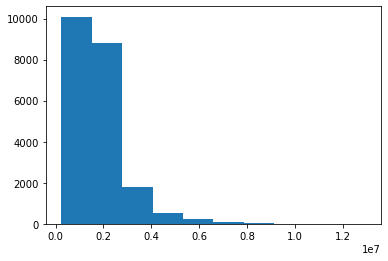

In [109]:
kc_df['P_zip_bdrm'] = kc_df['bedrooms']*kc_df['price_zipcode']
plt.hist(kc_df['P_zip_bdrm'], bins=10)
plt.show()

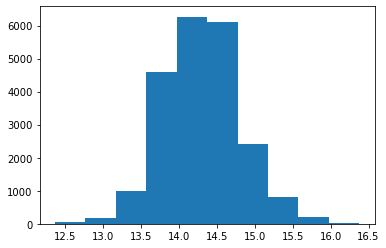

In [112]:
kc_df['P_zip_bdrm_lg'] =np.log(kc_df['P_zip_bdrm'])
plt.hist(kc_df['P_zip_bdrm_lg'], bins=10)
plt.show()

In [104]:
cat4 = ['view', 'waterfront','renovated', 'Age', 'basement', 'bedrooms','p_zipcode_Q', 'season']

In [105]:
cat4_kc_df = kc_df[cat4].astype('category')
dummies = pd.get_dummies(cat4_kc_df, prefix=cat4, drop_first=True)

kc_p3 = kc_df.drop(cat4, axis=1)

kc_p3 = pd.concat([kc_p3, dummies], axis=1)

In [106]:
X6 = kc_p3.drop(['price','price_zipcode','sqftlot_lg','sqftlv15_lg','id', 'date', 'lat', 'long', 'yr_renovated', 'zipcode', 'sqft_living', 'sqft_lot', 'yr_built', 'sqft_living15', 'sqft_basement', 'sqft_above', 'price_lg', 'sqft_lot15'], axis = 1)

In [107]:
predictors_int = sm.add_constant(X6)
model6 = sm.OLS(kc_df['price_lg'],predictors_int).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:               price_lg   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     3610.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        23:11:20   Log-Likelihood:                 2291.7
No. Observations:               21597   AIC:                            -4523.
Df Residuals:                   21567   BIC:                            -4284.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.7006      0.046    190.

In [127]:
cat4 = ['view', 'waterfront','renovated', 'Age', 'basement', 'bedrooms','p_zipcode_Q','season']

In [128]:
cat4_kc_df = kc_df[cat4].astype('category')
dummies = pd.get_dummies(cat4_kc_df, prefix=cat4, drop_first=True)

kc_p3 = kc_df.drop(cat4, axis=1)

kc_p3 = pd.concat([kc_p3, dummies], axis=1)

In [129]:
X7 = kc_p3.drop(['price','P_zip_bdrm', 'price_zipcode','sqftlot_lg','sqftlv15_lg','id', 'date', 'lat', 'long', 'yr_renovated', 'zipcode', 'sqft_living', 'sqft_lot', 'yr_built', 'sqft_living15', 'sqft_basement', 'sqft_above', 'price_lg', 'sqft_lot15'], axis = 1)

In [130]:
predictors_int = sm.add_constant(X7)
model7 = sm.OLS(kc_df['price_lg'],predictors_int).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:               price_lg   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     3944.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        23:25:40   Log-Likelihood:                 3088.2
No. Observations:               21597   AIC:                            -6116.
Df Residuals:                   21567   BIC:                            -5877.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.3650      0.162     -8.

In [ ]:
#Removing Price_zipcode

In [132]:
cat5 = ['view', 'waterfront','renovated', 'Age', 'basement', 'bedrooms','season']

In [133]:
cat5_kc_df = kc_df[cat5].astype('category')
dummies = pd.get_dummies(cat5_kc_df, prefix=cat5, drop_first=True)

kc_p4 = kc_df.drop(cat5, axis=1)

kc_p4 = pd.concat([kc_p4, dummies], axis=1)

In [138]:
X8 = kc_p4.drop(['price','P_zip_bdrm', 'price_zipcode','p_zipcode_Q','sqftlot_lg','sqftlv15_lg','id', 'date', 'lat', 'long', 'yr_renovated', 'zipcode', 'sqft_living', 'sqft_lot', 'yr_built', 'sqft_living15', 'sqft_basement', 'sqft_above', 'price_lg', 'sqft_lot15'], axis = 1)

In [139]:
predictors_int = sm.add_constant(X8)
model8 = sm.OLS(kc_df['price_lg'],predictors_int).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:               price_lg   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     4405.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        23:29:56   Log-Likelihood:                 2743.8
No. Observations:               21597   AIC:                            -5436.
Df Residuals:                   21571   BIC:                            -5228.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1529      0.067     -2.

In [ ]:
## Normality

/Users/brianm/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals Distribution Plot')

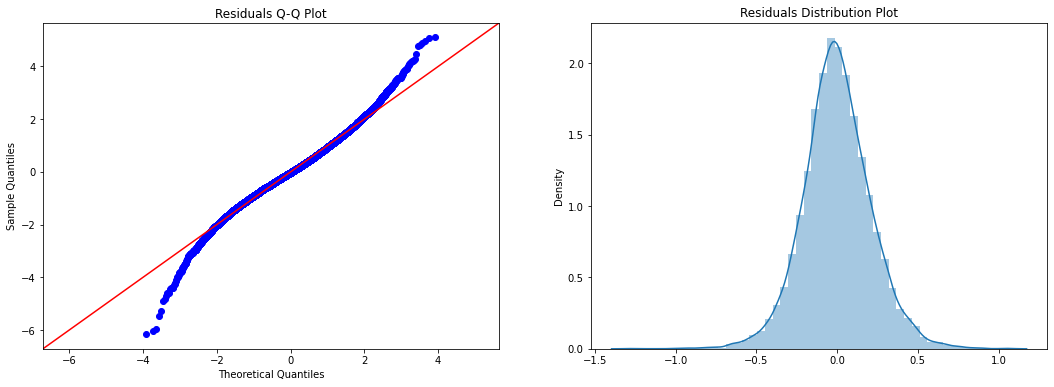

In [145]:
fig, axs = plt.subplots(ncols=2, figsize = (18,6))

residuals = model8.resid
sm.graphics.qqplot(residuals, dist = stats.norm, line='45', fit=True, ax=axs[0])
axs[0].set_title('Residuals Q-Q Plot')
sns.distplot(residuals, ax=axs[1])
axs[1].set_title('Residuals Distribution Plot')

Text(0.5, 1.0, 'Residuals Scatterplot')

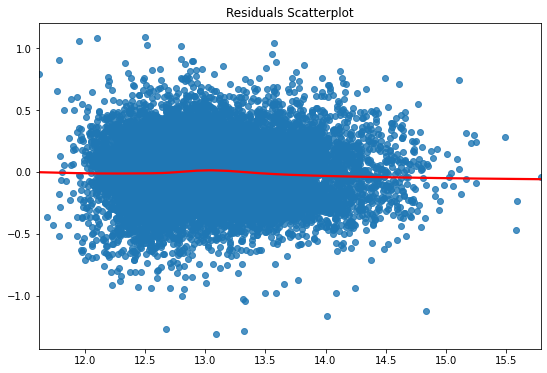

In [147]:
plt.figure(figsize=(9,6))
sns.regplot(x=model8.predict(), y=model8.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot')

In [ ]:

# demonstration of the power transform on data with a skew
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# generate normal data sample
d_set = randn(5000)
# add a skew to the data distribution
d_set = exp(d_set)
# histogram of the raw data with a skew
pyplot.hist(d_set, bins=50)
pyplot.show()
# reshape data to have rows and columns
d_set = d_set.reshape((len(d_set),1))
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
d_set_transformed = power.fit_transform(d_set)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

## Binning Categorical Variables


For categorical variables that contain many values, it will make more sense to bin these features before we convert them into dummy variables. Before we apply this technique to various features in our dataset, let's start by exploring how we would bin the feature "yr_renovated" into binned categories.

### Sale year

In [ ]:
#We will begin by looking at yr_renovated and determine how to manipulate this variable
kc_df.yr_renovated.sort_values().unique()

In [ ]:
#adding a new feature "renovated" that breaks down properties that were renovated in the 2010s, 2000s, or
#not at all if they were renovated over 20 years ago. 
kc_df['renovated'] = kc_df['yr_renovated'].apply(lambda x: 1 if x <= 1999 else 2 if x >= 2000 and x < 2010 else 3)
kc_df.head()

In [ ]:
#checking totals for each type of renovated unit:
kc_df.renovated.value_counts()

## Property Value by Zipcode

What neighborhood contains most valuable properties?

We see here that several variable-pairs are correlated with one another. We will consider dropping variables that are highly correlated with one another in order to prevent multicollinearity in our model.

Analyzing the average property values per zipcode results in Medina, Belleve, Mercer Island, Madison Park, and Capitol Hill area to be neighborhood with the highest average property values. Most properties in these neighborhood doubles the average property value of King County with average property value of Medina quadrupling that of King County. It seems that the proximity to the Lake Washington and large parks are driving the value of these properties higher.


In [ ]:
kc_df['price_zipcode'] = kc_df.groupby("zipcode")["price"].transform('mean')
kc_df
#catergrizin price by zipzone in percentiles

In [ ]:
quantiles = pd.qcut(kc_df['price_zipcode'], 5, labels=range(1,6))
kc_df= kc_df.assign(p_zipcode_Q=quartiles.values)
kc_df

In [ ]:
plt.scatter(kc_df['p_zipcode_Q'], kc_df['price'])

In [ ]:
#property values by zipcode calculation
kc_top5_price = kc_df.groupby("zipcode")["price"].mean().sort_values(ascending = False)[:5]
kc_mean_price = kc_df.price.mean()
#top5 neighborhood label for plot
area_labels = ["Medina", "Bellevue", "Mercer Island", 
               "Madison Park", "Capitol Hill"]

#plotting the data
plt.subplots(figsize=(8,4))
sns.barplot(x=kc_top5_price.index, y=kc_top5_price, order=kc_top5_price.index, palette="Blues_d") #blue for seahawks!
plt.xticks(np.arange(5), area_labels, rotation=75, size=8) #relabel x with list above
plt.hlines(kc_mean_price, -.5 ,4.5, colors="darkgoldenrod", label="Average Price") #plot average price horizontal line

#prettify graph
plt.xlabel("Neighborhoods", size=14)
plt.ylabel("Prices ($1mil)", size=14)
plt.title("Neighborhoods with Highest Property Price", size=16, y=1.08)
plt.legend() #show legend

#uncomment line below to export image
# plt.savefig("images/high_price_neighborhood.png",bbox_inches = "tight")
plt.show();

In [ ]:
kc_zip_price = kc_df.groupby("zipcode")["price"].count()

In [ ]:
len(kc_zip_price)


In [ ]:
#property values by zipcode calculation
kc_zip_price = kc_df.groupby("zipcode")["price"].mean().sort_values(ascending = False)
kc_mean_price = kc_df.price.mean()
#top5 neighborhood label for plot
area_labels = ["Medina", "Bellevue", "Mercer Island", 
               "Madison Park", "Capitol Hill"]

#plotting the data
plt.subplots(figsize=(8,4))
sns.barplot(x=kc_top5_price.index, y=kc_top5_price, order=kc_top5_price.index, palette="Blues_d") #blue for seahawks!
plt.xticks(np.arange(5), area_labels, rotation=75, size=8) #relabel x with list above
plt.hlines(kc_mean_price, -.5 ,4.5, colors="darkgoldenrod", label="Average Price") #plot average price horizontal line

#prettify graph
plt.xlabel("Neighborhoods", size=14)
plt.ylabel("Prices ($1mil)", size=14)
plt.title("Neighborhoods with Highest Property Price", size=16, y=1.08)
plt.legend() #show legend

#uncomment line below to export image
# plt.savefig("images/high_price_neighborhood.png",bbox_inches = "tight")
plt.show();

In [ ]:
#shapefile data setup
king_county = gpd.read_file("data/zipcode_shape/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp")
king_county["zipcode"] = king_county["ZIP"] #set up column for merge

#kc_df price setup
zip_price = kc_df.groupby("zipcode").price.mean()

#plotting data setup
zip_plot_df = king_county.join(zip_price, on="zipcode", how="inner")

## Property Value by Date

In [ ]:
 def getSeason(date):
    month = int(date.split("/")[0])
    if (month > 11 or month <= 3):
       return "Winter"
    elif (month == 4 or month == 5):
       return "Spring"
    elif (month >=6 and month <= 9):
       return "Summer"
    else:
       return "Fall"

In [ ]:
kc_df['season'] = kc_df.date.map(getSeason)
kc_df['season'].value_counts()

In [ ]:
#Next, let's plot scatter plots that will further help us identify outliers and categorical variables 
#fig, axes = plt.subplots()
x=kc_df['season']
y=kc_df['price']
#for ax, column in zip(axes.flatten(), kc_df.season):
#ax.scatter(x,y)
plt.scatter(x, y)
    #ax.set_title(f'Price vs {column}')
    #ax.set_xlabel(column)
    #ax.set_ylabel('Price in $100,000')

#fig.tight_layout()

## Bathroooms and Floors

In [ ]:
outlier_bedrooms = kc_df[kc_df['bedrooms'] == kc_df['bedrooms'].max()]


In [ ]:
kc_df.head()

This outlier house with 33 bedrooms, 1.75 bathrooms and 1 floor seems to have data entry issues that can not be imputed. This entry will thus be dropped.

In [ ]:
kc_df.drop(kc_df[kc_df['bedrooms'] == 33].index, inplace=True)

In [ ]:
plt.scatter(kc_df['bedrooms'], kc_df['price'])

## ANOVA of Property Prices using Top 5 Neighborhoods

In [ ]:
alpha = 0.05 
#ANOVA Test Setup
kc_top5 = kc_df[kc_df.zipcode.isin(kc_top5_price.index)]
formula = 'price~C(zipcode)'
lm_top5 = smf.ols(formula, kc_top5).fit()
anova_top5_table = sm.stats.anova_lm(lm_top5, typ=2)

if anova_top5_table["PR(>F)"][0] < alpha:
    print("Top 5 ranked zipcode have a statistically significant impact on average property value")
    print("Zipcdoe ANOVA F-statisic Probability: ", anova_top5_table["PR(>F)"][0])

## Property Value per Condition

Does Condition Affect Property Value?

In [ ]:
#-------------------Conditions Calculation--------------------------------#
condition_mean = kc_df.groupby("condition")["price"].mean()
condition_median = kc_df.groupby("condition")["price"].median()
condition_score = np.arange(1,6)

#--------------------------Bar Plots--------------------------------------#
#set subplot data
fig, ax = plt.subplots(figsize=(8,4))
ax2 = ax.twinx() #set ax2 on same x axis as ax
ax3 = ax.twinx() #same as above, for hline
width = 0.5

#barplots 
ax.bar(x=condition_score, height=condition_median, width=width,
       label="Median Price", color="midnightblue", alpha=0.8)
ax2.bar(x=condition_score, height=condition_mean, width=width,
        label="Mean Price", color="royalblue", alpha=0.8)

#horizontal line for mean price
ax3.hlines(kc_mean_price, .7 ,5.3, colors="red", label="Average Price")

#set ylimit to the same scale and display only 1
ax.set_ylim(0,1.2*condition_mean.max())
ax2.set_ylim(0,1.2*condition_mean.max())
ax3.set_ylim(0,1.2*condition_mean.max())
ax2.yaxis.set_visible(False) #hide the 2nd axis
ax3.yaxis.set_visible(False)

#set legend positions
ax.legend(bbox_to_anchor=(0,0,1,1), loc="upper left")
ax2.legend(bbox_to_anchor=(0,-.1,1,1), loc="upper left")
ax3.legend(bbox_to_anchor=(0,0,1,1), loc="upper right")

#prettify graph
ax.set_ylabel("Average Prices ($)", size=14)
ax.set_xlabel("Condition Score", size=14)
plt.title("Average Property Value per Condition", size=16, y=1.08)

#uncomment line below to export image
# plt.savefig("images/condition_value.png",bbox_inches = "tight")
plt.legend()
plt.show();

## ANOVA of Property Prices using Conditions

In [ ]:
alpha = 0.05 
#ANOVA Test Setup
formula = 'price~C(condition)'
lm_condition = smf.ols(formula, kc_df).fit()
anova_condition = sm.stats.anova_lm(lm_condition, typ=2)

if anova_condition["PR(>F)"][0] < alpha:
    print("The property condition have a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

Property Conditions Statistical Analysis 𝛼 = 0.05
Null-Hypothesis: There are no significant difference in average property value between different conditions. 
Alternative Hypothesis: There no significant difference in average property value between different conditions.
Property condition have significant affect on the value of the property. Both mean and median property prices are in upward trends as the condition increases. However, a slight dip in both aspects can be found on condition 4/5 compared to 3/5. This is most likely due to apartments/coop, which may have maintenance separete from the property itself. Therefore, the property value could be lower, due to smaller size, but have higher condition.

## Features and Upgrades of Property

Does a house having a basement add value to the property

In [ ]:
Does a renovation add value to the property?

In [ ]:
Does a renovation add value to the property

In [ ]:
Does a renovation add value to the property

In [ ]:
#--------------------------Property Feature Calculation---------------------------------------#
basement = kc_df[(kc_df["sqft_basement"] > 0)]
basement_mean = basement.price.mean()
no_basement = kc_df[(kc_df["sqft_basement"] == 0)]
no_basement_mean = no_basement.price.mean()

#mean values to plot
renovated = kc_df[(kc_df["yr_renovated"] > 0)]
renovated_mean = renovated.price.mean()
not_renovated = kc_df[(kc_df["yr_renovated"] == 0)]
not_renovated_mean = not_renovated.price.mean()

#prepare plot labels
label_basement = ["Basement", "No basement"]
values_basement = [basement_mean, no_basement_mean]
label_renovation = ["Renovated", "No Renovation"]
values_renovation = [renovated_mean, not_renovated_mean]

#--------------------------Bar Plots--------------------------------------#
fig, ax = plt.subplots(1, 2, figsize=(14,4))

sns.barplot(ax=ax[0], x=label_basement, y=values_basement, palette="Blues_r")
sns.barplot(ax=ax[1], x=label_renovation, y=values_renovation, palette="Blues_r")
ax[0].hlines(kc_mean_price, -.5 ,1.5, colors="coral", label="Average Price") #plot average price horizontal line
ax[1].hlines(kc_mean_price, -.5 ,1.5, colors="coral", label="Average Price") #plot average price horizontal line

#prettify graph
ax[0].set_ylabel("Average Prices ($)", size=12)
ax[0].set_title("Average Property Value", size=14)
ax[0].set_ylim(0,1.1*renovated_mean)
ax[0].legend()

ax[1].set_ylabel("Average Prices ($)", size=12)
ax[1].set_title("Average Property Value", size=14)
ax[1].set_ylim(0,1.1*renovated_mean)
ax[1].legend()

plt.suptitle("Affect of Basement and Renovation on Property Value", size=16, y=1.02)

#uncomment below to export image
# plt.savefig("images/basement_renovation_value.png",bbox_inches = "tight")
plt.show();

## Linear Regression Model

In [ ]:
formula = 'price ~' + "+" .join(kc_df.columns)
all_mod = ols(formula, kc_df).fit()
all_mod_summ = all_mod.summary()

In [ ]:
kc1 = kc_df[features]

In [ ]:
kc1

In [ ]:
formula = 'price ~' + "+" .join(kc1.columns[1:])
all_mod = ols(formula, kc1).fit()
all_mod_summ = all_mod.summary()

In [ ]:
print(all_mod_summ)

## Creating Dummy Variables 

In [ ]:
#List categorical variables
categoricals = [ 'view', 'floors', 'waterfront', 'condition',
                'grade','renovated', 'season', 'p_zipcode_Q']
categoricals

In [ ]:
# Create bar plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,15), sharey=True)

for col, ax in zip(categoricals, axes.flatten()):
    (kc_df.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [ ]:
# Create dummy variables for your six categorical features

# Create dummy variables for your six categorical features

cat_kc_df = kc_df[categoricals].astype('category')
dummies = pd.get_dummies(cat_kc_df, prefix=categoricals, drop_first=True)

kc_preprocessed = kc_df.drop(categoricals, axis=1)

kc_preprocessed = pd.concat([kc_preprocessed, dummies], axis=1)

kc_preprocess

In [ ]:
kc_preprocessed=kc_preprocessed.drop(['id', 'date', 'lat', 'long', 'yr_renovated', 'zipcode', 'price_zipcode'], axis=1)

In [ ]:
X = kc_preprocessed.drop(['price'], axis = 1)
y = kc_preprocessed['price']

In [ ]:
predictors_int = sm.add_constant(X)
model1 = sm.OLS(kc_preprocessed['price'],predictors_int).fit()

In [ ]:
print(model1.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from patsy import dmatrices
%%capture
#gather features
features = "+".join(kc_preprocessed.columns - ["price"])
y, X = dmatrices('price ~' + features, kc_preprocessed, return_type='dataframe')

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [ ]:
vif.round(1)

In [ ]:
# Removed the condition and grade because the VIF shows high collinaerity among these groups.
cat2 = ['view', 'floors', 'waterfront','renovated', 'season', 'p_zipcode_Q']

In [ ]:
cat2_kc_df = kc_df[cat2].astype('category')
dummies = pd.get_dummies(cat2_kc_df, prefix=cat2, drop_first=True)

kc_preprocessed2 = kc_df.drop(cat2, axis=1)

kc_preprocessed2 = pd.concat([kc_preprocessed2, dummies], axis=1)

In [ ]:
kc_preprocessed2=kc_preprocessed2.drop(['id', 'date', 'lat', 'long', 'yr_renovated', 'zipcode', 'price_zipcode'], axis=1)

In [ ]:
X1 = kc_preprocessed2.drop(['price'], axis = 1)
y1 = kc_preprocessed2['price']

In [ ]:
predictors_int = sm.add_constant(X1)
model2 = sm.OLS(kc_preprocessed2['price'],predictors_int).fit()
print(model2.summary())

In [ ]:
%%capture
#gather features
features2 = "+".join(kc_preprocessed2.columns - ["price"])
y1, X1 = dmatrices('price ~' + features2, kc_preprocessed2, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif.round(1)

In [ ]:
kc_preprocessed2.corr()

In [ ]:
#Look at which features are highly correlated with our y-variable, price.
kc_preprocessed2.corr()[abs(kc_preprocessed2.corr()['price']) > 0.3]

sqft_living seems to be strongly collilerated with price and other predictors. This will be dropped for now.

In [ ]:
kc_preprocessed3=kc_preprocessed2.drop(['sqft_living','grade', 'sqft_above'
                                       ], axis=1)

In [ ]:
X2 = kc_preprocessed3.drop(['price'], axis = 1)
y2 = kc_preprocessed3['price']

In [ ]:
predictors_int = sm.add_constant(X2)
model3 = sm.OLS(kc_preprocessed3['price'],predictors_int).fit()
print(model3.summary())

In [ ]:
alpha = 0.05 
#ANOVA Test Setup
formula = 'price~C(condition)'
lm_condition = smf.ols(formula, kc_df).fit()
anova_condition = sm.stats.anova_lm(lm_condition, typ=2)

if anova_condition["PR(>F)"][0] < alpha:
    print("The property condition have a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])